鉴于task1的内容过于简单，我这里就不整理了，下面看一下task1最后的kaggle房价预测

In [4]:
%matplotlib inline
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import sys
sys.path.append("/input")

In [5]:
print(torch.__version__)

1.0.0


与Kesci上的笔记对比，发现这里我的torch版本太低了，于是想升级到最新版。然后我在终端输入:

```bash
pip3 install --upgrade torch torchvision
```

很快下载并安装好了，然后我在Jupyter中更新了一下kernel发现得到的依然是1.0.0，我很不解，重启了一下电脑，然后发现还是没变。

然后我想是不是因为pip3 install的位置不对，我搜索了一下我的电脑中torch这个包的位置，发现竟然有两个位置有这个包，一个是在 `/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages`，这里存的是1.0.0，另一个是在`/usr/local/lib/python3.6/site-packages`，这里存的是1.4.0。

我在脑海中快速的回忆我很早之前下载torch应该也是用pip3 install的，但是为什么当时是下载在前者，而现在所有的包都安装在了后者呢？下载那里没用啊，python搜索包不在那里搜索。

然后我想更改pip3 install的位置，未果，用了好几种方法都没改成功，最后用了一个笨方法，直接pip3 install的时候指定下载位置，于是我cd进了 `/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages`，然后它又给我报错了:
```bash
error: must supply either home or prefix/exec-prefix -- not both
```
解决方案是，现在当前文件夹下创建`setup.cfg`，然后在其中加入：
```bash
[install]
prefix=
```
最后再`pip3 install --upgrade torch torchvision -t .`就终于成功了。

In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import sys
sys.path.append("/input")

In [2]:
print(torch.__version__)

1.4.0


作为一个非cs本科的cs研究生，我一直想补的是关于操作系统的知识，但由于时间关系一直没有开始，近期刚把cs61A刷掉，正在刷cs61B，打算和cs61C同步刷，两门课都是大工程，同时还得看自己图像分割领域的论文，还要学英语考托福，事情真的有点多，我的目标是一个半月把cs61B和cs61C刷完，好像说的有点多，不过好久没写博客了，难免多说几句。

其实我本来没打算做这个笔记的，目前来说感觉里面讲的基础知识比较浅显，主要是动手实践，如果没有相关基础的同学光看前面一点的基础知识很大可能是在云里雾里的，不过它的亮点就在于动手用Pytorch实践，这也是吸引我的原因，权当复习一下Pytorch好了，虽然我现在对深度学习不感兴趣了，但是后面可能还会用到。

大概在17，18年左右那个时候对什么机器学习啊，深度学习啊特别感兴趣，最开始我入门神经网络的是我在生物力学实验室的导师给我的一本书，它是翻译自 http://neuralnetworksanddeeplearning.com/ ，名字就叫 Neural Networks and Deep Learing，作者出身自物理系，对于模型的理解比较深入，当时觉得这本书很好，非常适合拿来入门，它会用比较直观的方法来向你解释神经网络可以work的原因。看完这本书后，我又相继看了西瓜书，统计学习方法，以及大热的cs231n。西瓜书和统计学习方法使我在机器学习上入了门，了解了很多相关名词，监督学习算法，非监督学习算法等等，但它们也只是一个大体的入门，要想深挖还是要看它们引的相关论文，才能更深入的了解这些算法，以及数学原理。我是一个对数学原理非常有执念的人，对于一个点，它一定得具有非常合理的数学可解释性，我也一定要把它的数学原理掌握，不然我就很难受，这也是后来为什么我对深度学习日渐丧失兴趣的原因。cs231n真正领我进入了深度学习的世界，今天我刚把我之前做的cs231n的笔记和作业上传到github上，当时做笔记和作业还是非常认真的，把lectures和readings都深入的看了，作业难度也确实不小，花了我挺多时间，不过做完还是非常有收获，虽然现在可能大部分都忘了，不过稍微复习一下应该就能回忆起来。

当时保研找的也是计算机视觉相关的实验室，那个时候一心只想脱离力学坑，投入CV的怀抱。后来我还看了模式学习和机器学习的圣经——Pattern Recognition and Machine Learing. 这真是本神书，难度也颇高，很多是从统计学上来解释机器学习，很有启发性，前一阵子听说某个校友把它的课后习题全部做完并上传到github，真是惭愧，当时我也有做它习题的打算，但是没坚持下去。暑期课程有个湾湾来的大概有50多岁的老师讲机器学习，用的就是这本书，他是完全按照这本书的内容讲，他在新竹开设这门课据说好多年，对于这本书的理解很深。我当时在看这本书的时候就有一些疑问，正好能去问他，他告诉我这个东西你不用这么深入的去想它，但我非得要给它找个完美的解释，最后未果，还是留有疑问，他也没有解释清楚。后来我又去看了CMU 邢波教授开的概率图模型，上个学期看的，大概看了有1/3后来因为期末搁置了，现在还在等待启动中。概率图可以用来解释机器学习模型，我一直认为它的应用前景很好，也值得深挖，确实应该重启概率图的学习了，说不定还会用到我的分割上。

我现在做的方向是用传统方法来解决分割，其实定方向的时候也纠结了很久，到底是用深度学习来做还是用传统方法，想了很久还是决定放弃深度学习，在分割问题上深度学习其实已经进入了一个瓶颈中，点的提升已经非常有限了，与其想方设法怎么改网络改参数，还不怎么具有可解释性，不如静下心来用传统方法来探究图像分割的本质。这对数学要求就比较高了，虽然大家都觉得我数学不错，但是我一直觉得我的数学理解不是很深刻，像数学分析高等代数复变函数这些课我都想拿出来再看一遍，但实在是没有时间，只能用的时候带着再看一下。其实也不是没时间，很多时候时间利用效率并不高，希望自己之后的效率能更高一点，能更专注。

像现在这样，静下心来思考，回忆，记录就很好，能感受到内心非常平静，也不焦躁要看论文，甚至没考虑再过一个多小时打卡就截止了，下面我们还是言归正传吧！

## 加载数据集

数据集包括每栋房子的特征，如街道类型，建造年份等，这些特征有连续的数字，离散的标签，甚至是缺失值"NAN"。我们要预测的是房子的价格。为了得到它的数据集，我第一次注册了kaggle，感觉以后有时间也可以在上面打一下比赛。

先通过`pandas`库读入并处理数据：

In [3]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')

In [4]:
train_data.shape

(1460, 81)

In [5]:
test_data.shape

(1459, 80)

看一下训练集的前四个特征，后两个特征和label

In [6]:
train_data.iloc[0:4, [0, 1, 2, 3, -3, -2, -1]]

,Id,MSSubClass,MSZoning,LotFrontage,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,WD,Normal,208500
1,2,20,RL,80.0,WD,Normal,181500
2,3,60,RL,68.0,WD,Normal,223500
3,4,70,RL,60.0,WD,Abnorml,140000


其中id是无关的特征，所以我们将其去掉得到如下所有的数据：

In [7]:
all_features = pd.concat([train_data.iloc[:, 1:-1], test_data.iloc[:, 1:]])

## 数据预处理

对于不同的数据类型要做不同的处理。对连续数值做标准化，将离散数值转化为指示特征

In [8]:
consistent_features= all_features.dtypes[all_features.dtypes != 'object'].index

In [9]:
all_features[consistent_features] = all_features[consistent_features].apply(
    lambda x : (x - x.mean()) / x.std())

因为标准化后数据特征的均值变为0，所以可以用0来代替缺失值

In [10]:
all_features[consistent_features] = all_features[consistent_features].fillna(0)

In [11]:
#dummy_na=True可以将缺失值当作合法的特征值并为其创建指示特征
all_features = pd.get_dummies(all_features, dummy_na=True)
all_features.shape

(2919, 331)

可以看到特征数从79增加到331，是因为离散数值转化成了指示特征

最后通过`values`属性得到Numpy格式的数据，并转成Tensor

In [12]:
n_train = train_data.shape[0]
train_features = torch.tensor(all_features[:n_train].values, dtype=torch.float)
test_features = torch.tensor(all_features[n_train:].values, dtype=torch.float)
train_labels = torch.tensor(train_data.SalePrice.values, dtype=torch.float).view(-1, 1)

## 训练模型

比赛用来评价模型的是对数均方根误差，给定预测值$\hat{y_1},....,\hat{y_n}$ 和真实标签 $y_1,...,y_n$,误差函数为：
$$
\sqrt{\frac{1}{n} \sum_{i=1}^n (log(y_i)-log(\hat{y_i}))^2}
$$

In [13]:
loss = torch.nn.MSELoss() #mean squared error
def log_rmse(net, features, labels):
    with torch.no_grad():
        # 将小于1的值设成1，使得取对数的时候更稳定
        clipped_preds = torch.max(net(features), torch.tensor(1.0))
        rmse = torch.sqrt(2*loss(clipped_preds.log(), labels.log()).mean())
    return rmse.item()

In [14]:
def train(net, train_features, train_labels, test_features, test_labels, 
         num_epoches, learning_rate, weight_decay, batch_size):
    train_ls, test_ls = [], []
    dataset = torch.utils.data.TensorDataset(train_features, train_labels)
    train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)
    optimizer = torch.optim.Adam(params=net.parameters(), lr=learning_rate, weight_decay=weight_decay)
    net = net.float()
    for epoch in range(num_epoches):
        for X, y in train_iter:
            l = loss(net(X.float()), y.float())
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        cur_loss = log_rmse(net, train_features, train_labels)
#         print(cur_loss)
        train_ls.append(cur_loss)
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls

In [15]:
def get_net(feature_num):
    net = nn.Linear(feature_num, 1)
    for param in net.parameters():
        nn.init.normal_(param, mean=0, std=0.01)
    return net

## K折交叉验证

下面实现了一个函数，它返回第i折交叉验证时所需要的训练数据和验证数据。

In [16]:
def get_k_fold_data(k, i, X, y):
    #返回第i折交叉验证的train和val集
    fold_size = X.shape[0] // k
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j*fold_size, (j+1)*fold_size)
        X_part, y_part = X[idx, :], y[idx]
        if j==i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = torch.cat((X_train, X_part), dim=0)
            y_train = torch.cat((y_train, y_part), dim=0)
    return X_train, y_train, X_valid, y_valid

在K折交叉验证中我们训练K次并返回训练和验证的平均误差

In [17]:
import matplotlib.pyplot as plt

In [18]:
def k_fold(k, X_train, y_train, num_epoches, learning_rate, weight_dacay, batch):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)
        net = get_net(X_train.shape[1])
        train_ls, valid_ls = train(net, *data, num_epoches, learning_rate, weight_dacay, batch_size)
#         print(train_ls)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]
        plt.figure(i)
        plt.plot(range(1, num_epoches+1), train_ls, label='train')
        plt.plot(range(1, num_epoches+1), valid_ls, label='valid')
        plt.xlabel('epochs')
        plt.ylabel('rmse')
    plt.show()

画出train和val集的loss曲线

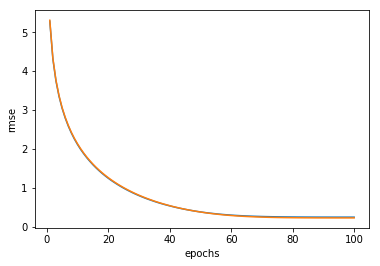

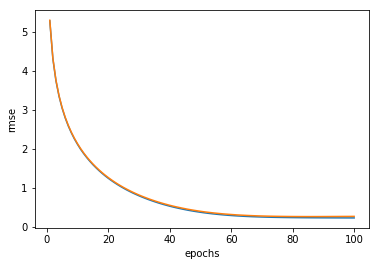

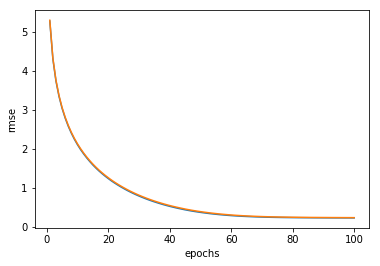

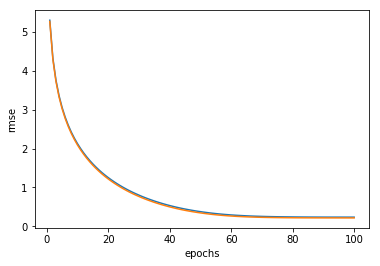

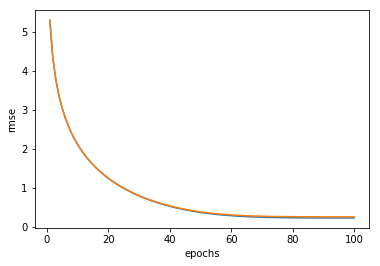

In [19]:
k, num_epoches, lr, weight_decay, batch_size = 5, 100, 5, 0, 64
k_fold(k, train_features, train_labels, num_epoches, lr, weight_decay, batch_size)

## 预测并保存结果

In [20]:
def train_and_pred(train_features, test_features, train_labels, test_data, num_epochs, lr,
                  weight_decay, batch_size):
    net = get_net(train_features.shape[1])
    train_ls, _ = train(net, train_features, train_labels, None, None, num_epochs, lr, weight_decay, batch_size)
    preds = net(test_features).detach().numpy()
#     print(preds.reshape(1, -1))
    test_data['SalePrice'] = pd.Series(preds.reshape(1, -1)[0])
    submission = pd.concat([test_data['Id'], test_data['SalePrice']], axis=1)
    submission.to_csv('./submission.csv', index=False)

In [22]:
train_and_pred(train_features, test_features, train_labels, test_data, num_epoches, lr, weight_decay, batch_size)